<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspc

  Preparing metadata (setup.py) ... done
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30861 sha256=566374d40e37084d79bedb1d683fdce9c684863cbdccb4c6848cee7654191632
  Stored in directory: /root/.cache/pip/wheels/42/2e/61/8c14d4c87cdb5204fb33924d00412f42ba06f65fba9157ff7b
Successfully built pyspc


In [2]:
from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [3]:
#uploaded = files.upload()

In [4]:
X = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/customers.csv', index_col=0)
print(X)

               X1   X2   X3   X4
SampleNumber                    
1             7.2  8.4  7.9  4.9
2             5.6  8.7  3.3  4.2
3             5.5  7.3  3.2  6.0
4             4.4  8.0  5.4  7.4
5             9.7  4.6  4.8  5.8
6             8.3  8.9  9.1  6.2
7             4.7  6.6  5.3  5.8
8             8.8  5.5  8.4  6.9
9             5.7  4.7  4.1  4.6
10            4.9  6.2  7.8  8.7
11            7.1  6.3  8.2  5.5
12            7.1  5.8  6.9  7.0
13            6.7  6.9  7.0  9.4
14            5.5  6.3  3.2  4.9
15            4.9  5.1  3.2  7.6
16            3.7  4.0  3.0  5.2
17            2.6  3.9  5.2  4.8
18            4.6  2.7  6.3  3.4
19            7.2  8.0  4.1  5.9
20            6.1  3.4  7.2  5.9


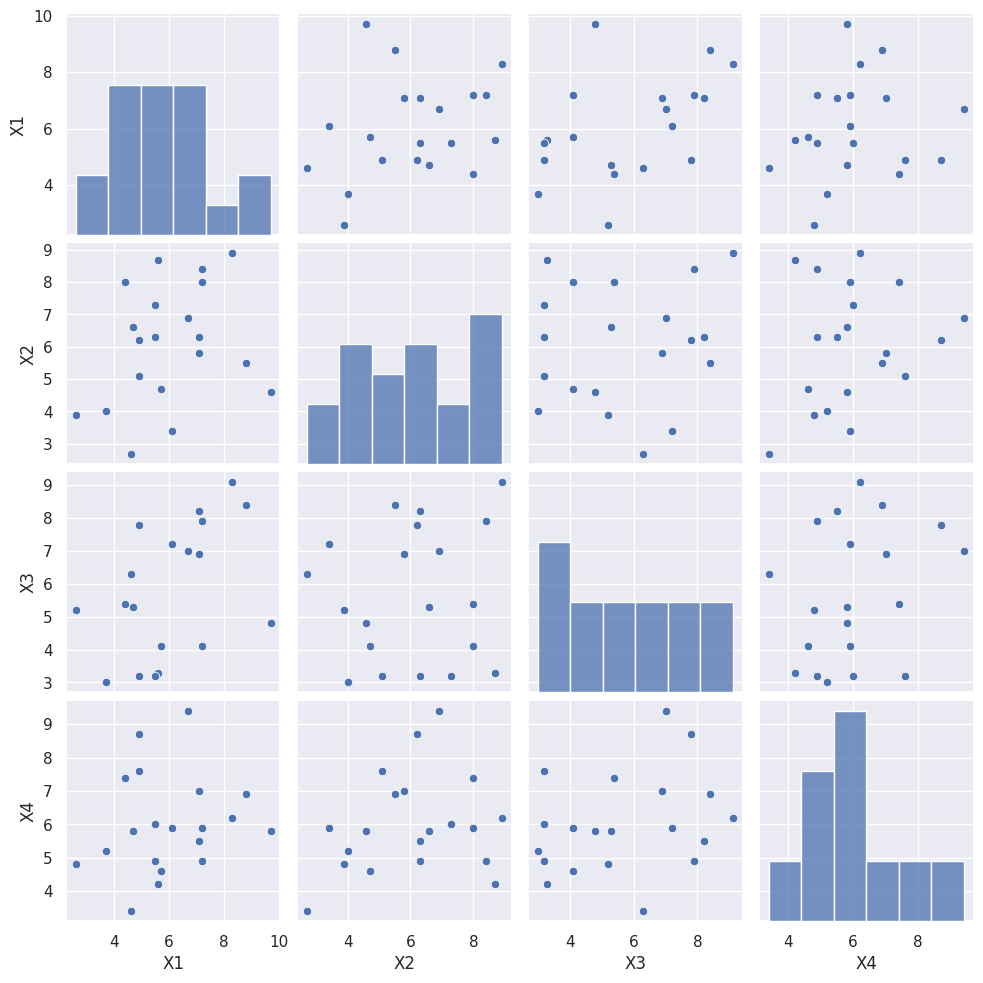

In [5]:
#pairplot
sns.pairplot(X)

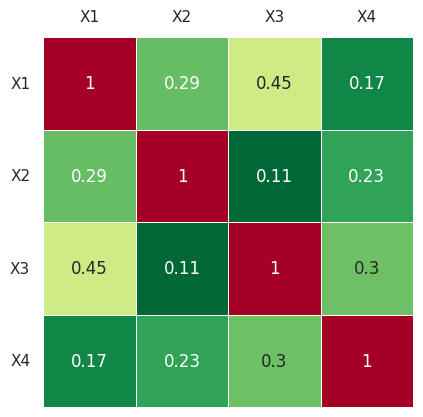

In [ ]:
#Correlation matrix
plt.figure()
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)

In [ ]:
#(a) and (b)
X = np.array(X)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The process mean and standard deviation are:')
print('Xbarbar = {0:.2f}, sigmahat = {1:.2f}'.format(Xbarbar, sigmahat))

The process mean and standard deviation are:
Xbarbar = 5.94, sigmahat = 1.59


In [ ]:
!pip install matplotlib==3.2.2

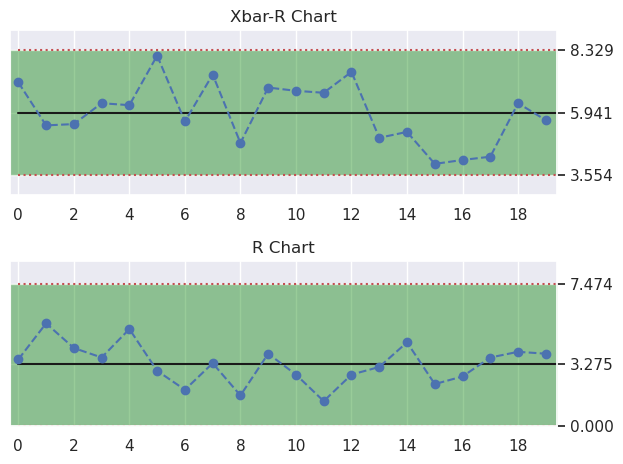

<pyspc: (8772877139551)>


In [ ]:
#(c) Plot X-bar and R charts
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [ ]:
#Delete outliers 16 and 17
X = np.delete(X, [16, 17], axis=0)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The revised grand mean and mean range are:')
print('Xbarbar = {0:.2f}, Rbar = {1:.2f}'.format(Xbarbar, Rbar))

The revised grand mean and mean range are:
Xbarbar = 6.14, Rbar = 3.29


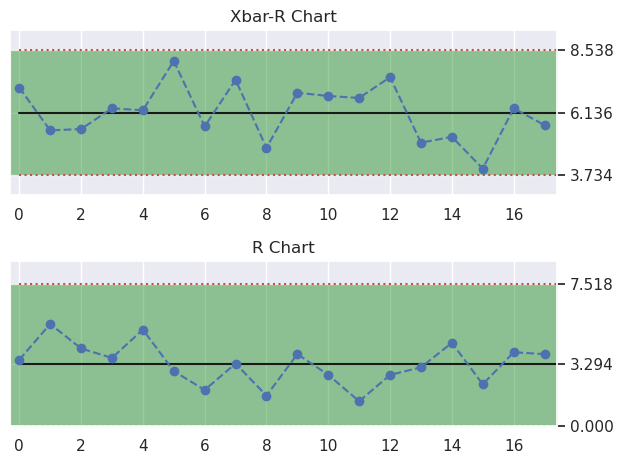

<pyspc: (8772877073808)>


In [ ]:
#(c) Plot revised X-bar and R charts
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [ ]:
#(d)
LSL = 1;  USL = 11
Cp = (USL-LSL)/(6*sigmahat)
CpL = (Xbarbar-LSL)/(3*sigmahat)
CpU = (USL-Xbarbar)/(3*sigmahat)
Cpk = np.min([CpL, CpU])
print('The process capability indices are:')
print('Cp = {0:.2f}, CpL = {1:.2f}, CpU = {2:.2f}, Cpk = {3:.2f}'.format(Cp, CpL, CpU, Cpk))
#Percentage of Nonconforming
PNC = 1-(norm.cdf((USL-Xbarbar)/sigmahat)-norm.cdf((LSL-Xbarbar)/sigmahat))
print('The total percentage of nonconforming produced by the process is:')
print('PNC = {:.4f}'.format(PNC))

The process capability indices are:
Cp = 1.04, CpL = 1.07, CpU = 1.01, Cpk = 1.01
The total percentage of nonconforming produced by the process is:
PNC = 0.0018
